Build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression by using the **Rain in Australia** dataset for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
### Drop  RISK_MM variable
df.drop(['RISK_MM'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Feature Engineering of Date Variable

In [9]:
df['Date'].dtypes

dtype('O')

In [10]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [12]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [13]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [15]:
# drop the original Date variable
df.drop('Date', axis=1, inplace = True)

In [16]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Missing value treatment

In [17]:
df.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [18]:
# display character variables
character  = [col for col in df.columns if df[col].dtypes == 'O']
character

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [19]:
# display numerical variables
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [20]:
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Year                 0
Month                0
Day                  0
dtype: int64

In [21]:
# finding percentage of missing values 
for col in numerical:
    if df[col].isnull().mean()>0:
        print(col, round(df[col].isnull().mean(),4))

MinTemp 0.0045
MaxTemp 0.0023
Rainfall 0.0099
Evaporation 0.4279
Sunshine 0.4769
WindGustSpeed 0.0652
WindSpeed9am 0.0095
WindSpeed3pm 0.0185
Humidity9am 0.0125
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3774
Cloud3pm 0.4015
Temp9am 0.0064
Temp3pm 0.0192


In [22]:
# filling missing values in mumerical 
for rows in df:
    for col in numerical:
        col_median=df[col].median()
        df[col].fillna(col_median, inplace=True)           
      

In [23]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [24]:
# for character data 
df[character].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [25]:
# filling missing values with mode 
for rows in df:
    df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
    df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
    df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)


In [26]:
df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1406
RainTomorrow        0
Year                0
Month               0
Day                 0
dtype: int64

In [27]:
# removing row with missing values in RainToday columns
df.dropna(inplace=True)

In [28]:
df.shape

(140787, 25)

In [29]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

### Outliers in numerical variables

In [30]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  140787.0  140787.0  140787.0     140787.0  140787.0       140787.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          5.0       9.0           46.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140787.0      140787.0     140787.0     140787.0     140787.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [31]:
for col in numerical:
    print(col)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
Year
Month
Day


In [32]:
for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR of', col, 'is', IQR)
    df[col] = np.where(df[col] <df[col].quantile(0.10), df[col].quantile(0.10),df[col])
    df[col] = np.where(df[col] >df[col].quantile(0.90), df[col].quantile(0.90),df[col])


IQR of MinTemp is 9.200000000000001
IQR of MaxTemp is 10.3
IQR of Rainfall is 0.8
IQR of Evaporation is 1.4000000000000004
IQR of Sunshine is 0.5
IQR of WindGustSpeed is 15.0
IQR of WindSpeed9am is 12.0
IQR of WindSpeed3pm is 11.0
IQR of Humidity9am is 26.0
IQR of Humidity3pm is 28.0
IQR of Pressure9am is 8.299999999999955
IQR of Pressure3pm is 8.399999999999977
IQR of Cloud9am is 3.0
IQR of Cloud3pm is 2.0
IQR of Temp9am is 9.2
IQR of Temp3pm is 9.600000000000001
IQR of Year is 4.0
IQR of Month is 6.0
IQR of Day is 15.0


In [33]:
df.shape

(140787, 25)

In [34]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

### Encode character variables

In [35]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

df = encoder.fit_transform(df)


In [36]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,8.0,5.0,16.9,21.8,0,1,No,2009.0,11.0,4.0
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,5.0,5.0,17.2,24.3,0,1,No,2009.0,11.0,4.0
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,5.0,2.0,21.0,23.2,0,1,No,2009.0,11.0,4.0
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,5.0,5.0,18.1,26.5,0,1,No,2009.0,11.0,4.0
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,7.0,7.0,17.8,29.7,0,1,No,2009.0,11.0,5.0


In [37]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [38]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
Y = df['RainTomorrow'].replace({'No':0,'Yes':1})

In [40]:
Y.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [41]:
X = pd.concat([df[numerical], df[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(df.Location), 
                     pd.get_dummies(df.WindGustDir),
                     pd.get_dummies(df.WindDir9am),
                     pd.get_dummies(df.WindDir3pm)], axis=1)

In [42]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,23.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,44.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,23.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 142192
Columns: 118 entries, MinTemp to WSW
dtypes: float64(19), int64(2), uint8(97)
memory usage: 36.7 MB


In [44]:
X.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
SSW            0
SW             0
W              0
WNW            0
WSW            0
Length: 118, dtype: int64

In [45]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [46]:
X_train.shape, X_test.shape

((112629, 118), (28158, 118))

In [47]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
90820,13.0,22.7,0.0,4.8,8.5,24.0,9.0,13.0,66.0,49.0,...,1,0,0,0,0,0,0,0,0,0
137786,20.8,32.9,0.0,5.0,11.0,37.0,13.0,22.0,68.0,57.0,...,0,0,0,0,0,0,0,0,0,0
41839,17.0,22.5,0.2,4.8,8.5,44.0,19.0,30.0,62.0,60.0,...,0,0,0,0,1,0,0,0,0,0
68005,14.8,17.8,0.4,3.0,3.7,39.0,9.0,19.0,83.0,73.0,...,0,0,1,0,0,0,0,0,0,0
100122,4.0,15.1,0.2,2.0,4.5,26.0,7.0,9.0,94.0,66.0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
4611,11.8,19.3,0.0,4.8,8.5,56.0,26.0,26.0,45.0,41.0,...,0,0,0,0,0,1,0,0,0,0
38559,4.0,15.2,0.2,4.8,8.5,24.0,7.0,15.0,93.0,65.0,...,0,0,0,0,0,0,0,0,1,0
131051,12.1,24.2,0.0,4.8,8.5,35.0,11.0,9.0,73.0,54.0,...,0,1,0,0,0,0,0,0,0,0
19464,17.4,24.7,0.0,4.8,8.5,24.0,7.0,11.0,80.0,60.0,...,0,0,0,0,0,0,0,0,0,0
31678,13.4,26.1,0.0,4.2,9.0,24.0,20.0,13.0,59.0,36.0,...,0,0,0,0,0,0,0,0,0,0


##  Model training

In [49]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
logreg.predict_proba(X_test)[:,0]

array([0.93712236, 0.8585694 , 0.80537572, ..., 0.8387002 , 0.58440408,
       0.81985035])

In [52]:
logreg.predict_proba(X_test)[:,1]

array([0.06287764, 0.1414306 , 0.19462428, ..., 0.1612998 , 0.41559592,
       0.18014965])

In [53]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8396


In [54]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8450


### Check for overfitting and underfitting

In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8450
Test set score: 0.8396


In [57]:
import numpy as np
error_rate = []
test = []
train = []

c = [0.0001,0.001,0.01,0.1,1,10,100]
for i in c:
    print ('c = ',i)
    # fit the Logsitic Regression model with C in the list

    # instantiate the model
    logreg = LogisticRegression(C=i, solver='liblinear', random_state=0)


    # fit the model
    logreg.fit(X_train, y_train)
    pred = logreg.predict(X_test)
    train_accuracy=logreg.score(X_train,y_train)
    test_accuracy=logreg.score(X_test,y_test)
    train.append(train_accuracy)
    test.append(test_accuracy)
    print('Train Acc',train_accuracy)
    print('Test Acc',test_accuracy)
    
    accuracy = accuracy_score(y_test,pred,normalize=True) * float(100)
    

    print('CV accuracy for c = %.4f%% is %.4f%%' % (i, accuracy))
    error_rate.append(np.mean(pred != y_test))
    
    


c =  0.0001
Train Acc 0.8416127285157464
Test Acc 0.8362809858654734
CV accuracy for c = 0.0001% is 83.6281%
c =  0.001
Train Acc 0.8436281952250309
Test Acc 0.8374529441011436
CV accuracy for c = 0.0010% is 83.7453%
c =  0.01
Train Acc 0.8434239849417113
Test Acc 0.8370622913559201
CV accuracy for c = 0.0100% is 83.7062%
c =  0.1
Train Acc 0.8448445782169779
Test Acc 0.8393351800554016
CV accuracy for c = 0.1000% is 83.9335%
c =  1
Train Acc 0.8449600014205932
Test Acc 0.8395837772569075
CV accuracy for c = 1.0000% is 83.9584%
c =  10
Train Acc 0.8444184002343978
Test Acc 0.8383407912493785
CV accuracy for c = 10.0000% is 83.8341%
c =  100
Train Acc 0.8447913059691554
Test Acc 0.8386959301086725
CV accuracy for c = 100.0000% is 83.8696%


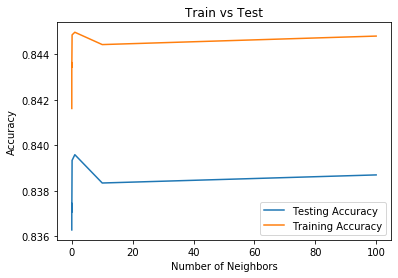

In [58]:

plt.title('Train vs Test')
plt.plot(c, test, label = 'Testing Accuracy')
plt.plot(c, train, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [59]:
y_test.value_counts()

0    21813
1     6345
Name: RainTomorrow, dtype: int64

In [60]:
null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


In [61]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20527  1286]
 [ 3231  3114]]

True Positives(TP) =  20527

True Negatives(TN) =  3114

False Positives(FP) =  1286

False Negatives(FN) =  3231


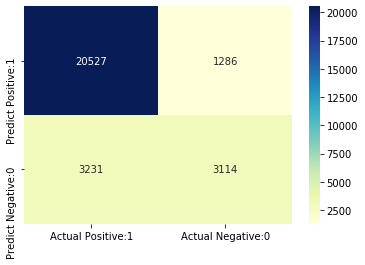

In [62]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

##  Classification metrices

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     21813
           1       0.71      0.49      0.58      6345

    accuracy                           0.84     28158
   macro avg       0.79      0.72      0.74     28158
weighted avg       0.83      0.84      0.83     28158



### Classification accuracy

In [64]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [65]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8396


In [66]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1604


In [67]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9410


In [68]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8640


In [69]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8640


In [70]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2923


In [71]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7077


## Adjusting the threshold level

In [72]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.93909012, 0.06090988],
       [0.86360351, 0.13639649],
       [0.80818168, 0.19181832],
       [0.93086193, 0.06913807],
       [0.9871962 , 0.0128038 ],
       [0.64412516, 0.35587484],
       [0.93624531, 0.06375469],
       [0.92913319, 0.07086681],
       [0.45744171, 0.54255829],
       [0.31063471, 0.68936529]])

In [73]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.939090,0.060910
1,0.863604,0.136396
2,0.808182,0.191818
3,0.930862,0.069138
4,0.987196,0.012804
5,0.644125,0.355875
6,0.936245,0.063755
7,0.929133,0.070867
8,0.457442,0.542558
9,0.310635,0.689365


In [74]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.06090988, 0.13639649, 0.19181832, 0.06913807, 0.0128038 ,
       0.35587484, 0.06375469, 0.07086681, 0.54255829, 0.68936529])

In [75]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

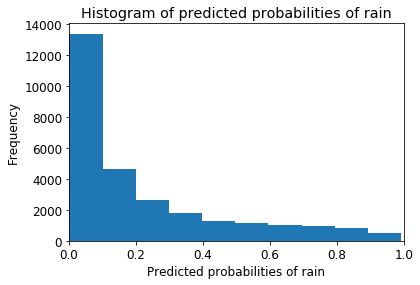

In [76]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

##  k-Fold Cross Validation

In [77]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84369173 0.84440202 0.84275948 0.84111693 0.84914539]


In [78]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8442


## Hyperparameter Optimization using GridSearch CV

In [79]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=100, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [80]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8448


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [81]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8389


# Conclusion

    We have successfully predicted whether it will rain in Australia or not with an accuracy of above 80%
    We have learnt various new curves like the ROC curve
    We have learnt about the best parameters
    We have learnt to analyse our data very deeply
